In [420]:
import math
import scipy.optimize
import pylab
import numpy

In [551]:
minimumIOI = 0.1
maximumIOI = 6
optimumIOI = 0.6

mu = optimumIOI
sigma  = 0.3

In [687]:
x_axis_values = numpy.geomspace(0.01,7,100) # 100 logarithmically spaced numbers

In [456]:
# Salience of IOI
def S(x, mu, sigma):
    return math.exp(-(math.log10(x)-math.log10(mu))**2/(2*sigma**2))

In [457]:
def M(x,ns, mu, sigma):
    return sum(list(map(lambda n : S(n*x, mu, sigma), ns)))

In [458]:
def proportions(pulse_lengths):
    y = list()
    for i in range(len(pulse_lengths)-1):
        y.append(pulse_lengths[i+1] / pulse_lengths[i])
    return y

In [459]:
def x_max(proportions):
    return maximumIOI / proportions[-1]

In [557]:
def pulse_levels_attractor(pulse_levels, mu, sigma, disp=True):
    ioi = scipy.optimize.fmin(lambda x: -M(x,pulse_levels, mu, sigma), 0.1, disp=disp)[0]
    bpm = 60/ioi
    print("ioi: " + str(ioi) + "\t bpm: " + str(bpm))
    
    if disp:
        y_M = list(map(lambda z : M(z,pulse_levels, mu, sigma), x_axis_values))
        pylab.semilogx(x_axis_values,y_M)
        y_S = list(map(lambda z : S(z,mu, sigma), x_axis_values))
        pylab.semilogx(x_axis_values,y_S)
        for pulse in pulse_levels:
            pylab.axvline(x=pulse*ioi)
        pylab.show() # show the plot

# Examples

### Mozart Sonata no 15 in C Major, allegro movement

A tempo marking of Allegro suggests 120 - 160 bpm

the 4/4 time signature suggests a crotchet pulse. Metrical levels used are semiquavers, quavers, crotchets and minims

Optimization terminated successfully.
         Current function value: -2.475869
         Iterations: 18
         Function evaluations: 36
ioi: 0.6000000000000018	 bpm: 99.9999999999997


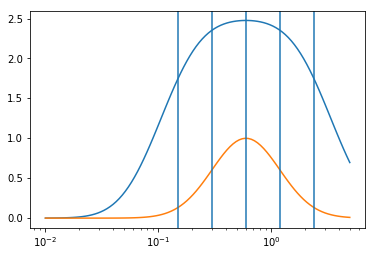

In [560]:
pulse_levels_attractor([0.25,0.5,1,2,4], 0.6, 0.3)

The attractor tempo would therefore be a bpm of 100, much below what the piece is played at. The piece can therefore be considered **fast**.

### Barber's Adagio for strings

Tempo marking of molto adagio would suggest a bpm of 75 max

4/2 time signature suggests a minim pulse. Metrical levels used are crotchets, minims, semibreves and breves. 

Optimization terminated successfully.
         Current function value: -2.407777
         Iterations: 17
         Function evaluations: 34
ioi: 0.4242968750000012	 bpm: 141.41042165347042


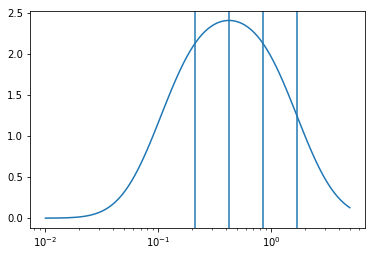

In [544]:
pulse_levels_attractor([0.5,1,2,4], 0.6, 0.3)

The attractor tempo would therefore be a bpm of 141, much above what the piece is played at. The piece can therefore be considered **slow**.



###  Pachelbel's Cannon in D

Crotchet = 56

4/4 - consider a crotchet (cello part) pulse. At first crothet level is used, then quaver, then semi-quaver then demi-semi-quaver

In [467]:
pulse_levels_attractor([1],0.6, 0.3, False)

ioi: 0.6000000000000018	 bpm: 99.9999999999997


In [468]:
pulse_levels_attractor([0.5,1],0.6, 0.3, False)

ioi: 0.8485156250000028	 bpm: 70.71172083601856


In [469]:
pulse_levels_attractor([0.25,0.5,1],0.6, 0.3, False)

ioi: 1.2000000000000042	 bpm: 49.99999999999983


In [470]:
pulse_levels_attractor([0.125, 0.25, 0.5, 1],0.6, 0.3, False)

ioi: 1.6970312500000064	 bpm: 35.35586041800926


Here we can see that as the different metrical layers are added to the piece, the perceived "fastness" increases

### Mozart

In [475]:
pulse_levels_attractor([0.25,0.5,1,2,4], 0.565, 0.3, False)

ioi: 0.5650000000000017	 bpm: 106.1946902654864


5.8% change in the prefered IOI -> 6.2% change in attractor tempo

In [479]:
pulse_levels_attractor([0.25,0.5,1,2,4], 0.429, 0.3, False)

ioi: 0.4289843750000012	 bpm: 139.86523401930393


In [480]:
pulse_levels_attractor([0.25,0.5,1,2,4], 0.725, 0.3, False)

ioi: 0.7250000000000023	 bpm: 82.7586206896549


n.b. These previous examples are symmetric so the attractor tempo is just mu

### Pachabel

In [481]:
pulse_levels_attractor([0.25, 0.5, 1], 0.6, 0.3,False)

ioi: 1.2000000000000042	 bpm: 49.99999999999983


In [482]:
pulse_levels_attractor([0.25, 0.5, 1], 0.429, 0.3,False)

ioi: 0.8579687500000028	 bpm: 69.93261700965192


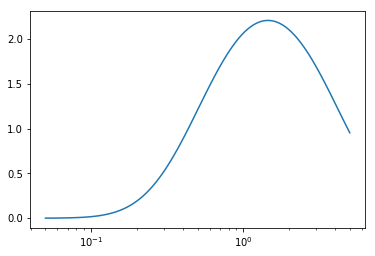

Optimization terminated successfully.
         Current function value: -2.208897
         Iterations: 21
         Function evaluations: 42
ioi: 1.450000000000005	 bpm: 41.379310344827445


In [483]:
pulse_levels_attractor([0.25, 0.5, 1], 0.725, 0.3,True)

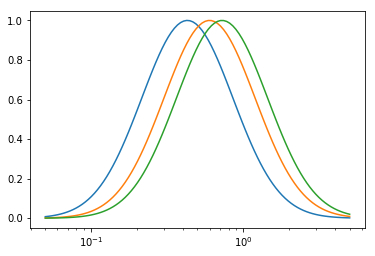

In [484]:
pulse_levels = [1]
x_axis_values = numpy.geomspace(0.05,5,100) # 100 logarithmically spaced numbers
y_429 = list(map(lambda z : M(z,pulse_levels, 0.429, 0.3), x_axis_values))
pylab.semilogx(x_axis_values,y_429)
y_600 = list(map(lambda z : M(z,pulse_levels, 0.6, 0.3), x_axis_values))
pylab.semilogx(x_axis_values,y_600)
y_725 = list(map(lambda z : M(z,pulse_levels, 0.725, 0.3), x_axis_values))
pylab.semilogx(x_axis_values,y_725)
pylab.show()

# Weighting parts

In [689]:
def M(x,ns,mu,sigma,weights=None):
    if weights == None:
        weights = [1] * len(ns)
    return sum(list(map(lambda n : n[1] * S(n[0]*x,mu,sigma), list(zip(ns,weights)))))

In [690]:
def pulse_levels_attractor(pulse_levels, mu, sigma, weights=None, disp=True):
    if weights == None:
        weights = [1] * len(pulse_levels)
    ioi = scipy.optimize.fmin(lambda z: -M(z,pulse_levels, mu, sigma, weights), 0.1, disp=False)[0]
    bpm = 60/ioi
    print("ioi: " + str(ioi) + "\t bpm: " + str(bpm))
    
    if disp:
        y_M = list(map(lambda z : M(z,pulse_levels, mu, sigma), x_axis_values))
        pylab.semilogx(x_axis_values,y_M)
        y_S = list(map(lambda z : S(z,mu, sigma), x_axis_values))
        pylab.semilogx(x_axis_values,y_S)
        for pulse in pulse_levels:
            pylab.axvline(x=pulse*ioi)
        pylab.show() # show the plot

[1, 1, 1]
ioi: 1.2000023447412658	 bpm: 49.999902302638155	 Salience: 2.2088965094412645


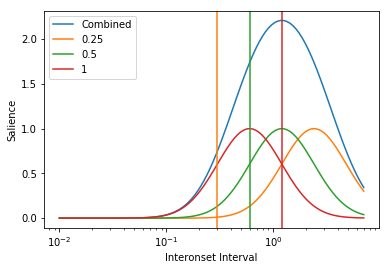

[1.5, 1, 1]
ioi: 1.4585570388910996	 bpm: 41.13654687485951	 Salience: 2.555048979497017


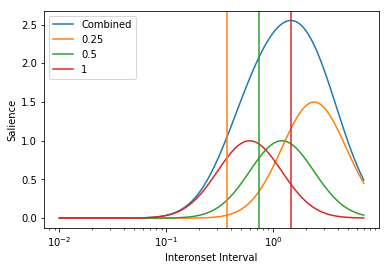

In [927]:
pulse_levels_attractor([0.25,0.5,1],0.6,0.3)
pulse_levels_attractor([0.25,0.5,1],0.6,0.3,[1.5,1,1])

# Mutual Attraction

In [940]:
def mutual_attractions(pulse_levels, weights, multiplier):
    new_weights = weights
    for i in range(len(weights)):
        current_level = pulse_levels[i]
        current_weight = weights[i]
        if (i>0 and (current_level/pulse_levels[i-1]) in [2,3]) or (i<len(weights)-1 and (pulse_levels[i+1]/current_level) in [2,3]):
            new_weights[i] = multiplier * current_weight
            continue
        new_weights[i] = current_weight
    return new_weights

In [941]:
mutual_attractions([1,4,12],[1,1,1],2)

[1, 2, 2]

In [879]:
def pulse_levels_attractor(pulse_levels, mu, sigma, weights=None, mutual_attraction=1, disp=True):
    if weights is None:
        weights = [1] * len(pulse_levels)
        
    weights = mutual_attractions(pulse_levels,weights,mutual_attraction)
    print(weights)
    
    y_M = list(map(lambda z : M(z,pulse_levels, mu, sigma, weights), x_axis_values))
    guess = x_axis_values[np.argmax(y_M)]
    ioi = scipy.optimize.fmin(lambda z: -M(z,pulse_levels, mu, sigma, weights), guess, disp=False)[0]
    bpm = 60/ioi
    salience = M_weights(ioi,pulse_levels, mu, sigma, weights)
    print("ioi: " + str(ioi) + "\t bpm: " + str(bpm) + '\t Salience: ' + str(salience))
    
    if disp:
        f = pylab.figure()
        pylab.semilogx(x_axis_values,y_M)
        for (x,w) in zip(pulse_levels,weights):
            y_S = list(map(lambda z : w*S(z*x,mu, sigma), x_axis_values))
            pylab.semilogx(x_axis_values,y_S)   
        i =0
        bar_colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        for pulse in pulse_levels:
            pylab.axvline(x=pulse*ioi, color=bar_colors[i])
            i = i+1
        pylab.xlabel('Interonset Interval')
        pylab.ylabel('Salience')
        pylab.legend(['Combined'] + pulse_levels)
        pylab.show()
        f.savefig(str(pulse_levels)+".pdf", bbox_inches='tight')

[1, 1, 1]
ioi: 0.31345310267188475	 bpm: 191.41619428411457	 Salience: 1.481526098259103


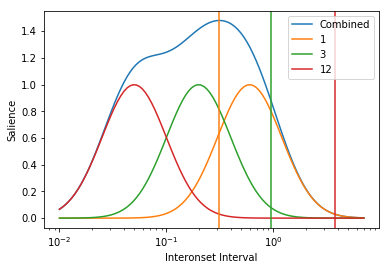

[2, 2, 1]
ioi: 0.3324864866898149	 bpm: 180.45846192833554	 Salience: 2.9370988138587135


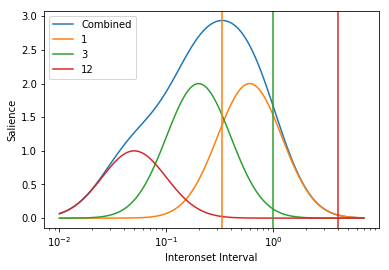

In [945]:
pulse_levels_attractor([1,3,12],0.6,0.3)
pulse_levels_attractor([1,3,12],0.6,0.3,mutual_attraction=2)

### Specific Examples

ioi: 0.31345310267188475	 bpm: 191.41619428411457	 Salience: 1.481526098259103


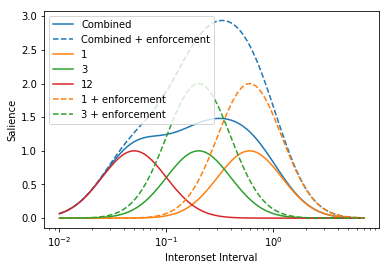

In [962]:
weights = [1,1,1]
pulse_levels = [1,3,12]
mu = 0.6
sigma = 0.3
mutual_weights = [2,2,1]

y_M = list(map(lambda z : M(z,pulse_levels, mu, sigma, weights), x_axis_values))
guess = x_axis_values[np.argmax(y_M)]
ioi = scipy.optimize.fmin(lambda z: -M(z,pulse_levels, mu, sigma, weights), guess, disp=False)[0]
bpm = 60/ioi
salience = M_weights(ioi,pulse_levels, mu, sigma, weights)
print("ioi: " + str(ioi) + "\t bpm: " + str(bpm) + '\t Salience: ' + str(salience))

y_M_mutual = list(map(lambda z : M(z,pulse_levels, mu, sigma, mutual_weights), x_axis_values))
guess_mutual = x_axis_values[np.argmax(y_M_mutual)]
ioi_mutual = scipy.optimize.fmin(lambda z: -M(z,pulse_levels, mu, sigma, mutual_weights), guess, disp=False)[0]

f = pylab.figure()
pylab.semilogx(x_axis_values,y_M)
pylab.semilogx(x_axis_values,y_M_mutual ,color='#1f77b4', linestyle='--')
for (x,w) in zip(pulse_levels,weights):
    y_S = list(map(lambda z : w*S(z*x,mu, sigma), x_axis_values))
    pylab.semilogx(x_axis_values,y_S)  

bar_colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

y_S = list(map(lambda z : 2*S(z*1,mu, sigma), x_axis_values))
pylab.semilogx(x_axis_values,y_S,color=bar_colors[0], linestyle='--')  
y_S = list(map(lambda z : 2*S(z*3,mu, sigma), x_axis_values))
pylab.semilogx(x_axis_values,y_S,color=bar_colors[1], linestyle='--')  

# pylab.axvline(x=1*ioi, color=bar_colors[0])
# pylab.axvline(x=3*ioi, color=bar_colors[1])
# pylab.axvline(x=12*ioi, color=bar_colors[2])
# pylab.axvline(x=1*ioi_mutual, color=bar_colors[0], linestyle = '--')
# pylab.axvline(x=3*ioi_mutual, color=bar_colors[1], linestyle = '--')
# pylab.axvline(x=12*ioi_mutual, color=bar_colors[2], linestyle = '--')
    
    
pylab.xlabel('Interonset Interval')
pylab.ylabel('Salience')
pylab.legend(['Combined','Combined + enforcement'] + pulse_levels + ['1 + enforcement','3 + enforcement'])
pylab.show()
f.savefig("mutual_enforcement.pdf", bbox_inches='tight')

## Triplets

[1, 1, 1]
ioi: 0.6396685822331205	 bpm: 93.79857267733313	 Salience: 2.0088722994704393


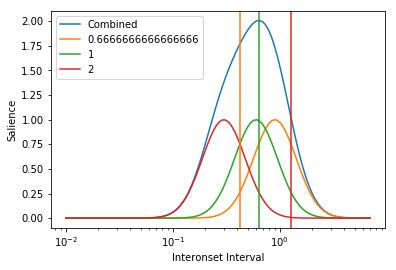

In [880]:
pulse_levels_attractor([2/3,1,2],0.6,0.2)

## Change in mu

In [884]:
pulse_levels_attractor([0.5,1,2],0.6,0.2, disp=False)

[1, 1, 1]
ioi: 0.6000100732929268	 bpm: 99.99832114603151	 Salience: 1.6442998547675987


In [889]:
pulse_levels_attractor([0.5,1,2],0.6 * 0.5,0.2, disp=False)

[1, 1, 1]
ioi: 0.3000022984889985	 bpm: 199.99846768574102	 Salience: 1.6442998548647512


## New Salience Curve

In [772]:
def S(x, mu, sigma, pinch=0):
    return math.exp(-(1+pinch*x)*math.log10(x/mu)**2/(2*sigma**2))

In [774]:
S(2,0.6,0.2,0.2)

0.008357982659695956

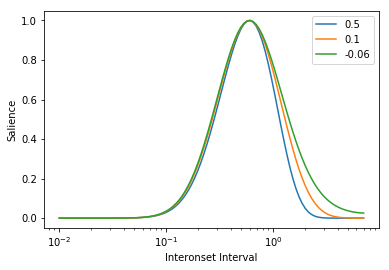

In [903]:
f = pylab.figure()
pinches = [0.5,0.1,-0.06]
for pinch in pinches:
    y = list(map(lambda z : S(z, mu, sigma, pinch), x_axis_values))
    pylab.semilogx(x_axis_values,y)
pylab.xlabel('Interonset Interval')
pylab.ylabel('Salience')
pylab.legend(pinches)
pylab.show()
f.savefig("pinches.pdf", bbox_inches='tight')
pylab.show() # show the plot

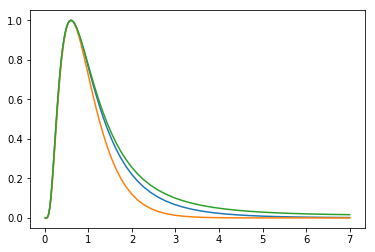

In [801]:
for pinch in [0,0.2,-0.05]:
    y = list(map(lambda z : S(z, mu, sigma, pinch), x_axis_values))
    pylab.plot(x_axis_values,y)
pylab.show() # show the plot

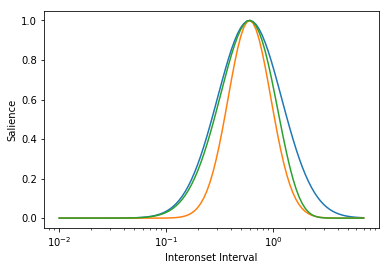

In [915]:
y = list(map(lambda z : S(z, 0.6, 0.3), x_axis_values))
pylab.semilogx(x_axis_values,y)
y = list(map(lambda z : S(z, 0.6, 0.2), x_axis_values))
pylab.semilogx(x_axis_values,y)
y = list(map(lambda z : S(z, 0.6, 0.3, 0.5), x_axis_values))
pylab.semilogx(x_axis_values,y)
pylab.xlabel('Interonset Interval')
pylab.ylabel('Salience')
pylab.show()
pylab.show() # show the plot